C:\Users\robsc\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:907: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\robsc\Documents\Computational Physics MSc\VASP Simulations
  " was found in {}".format(os.path.abspath(p)))


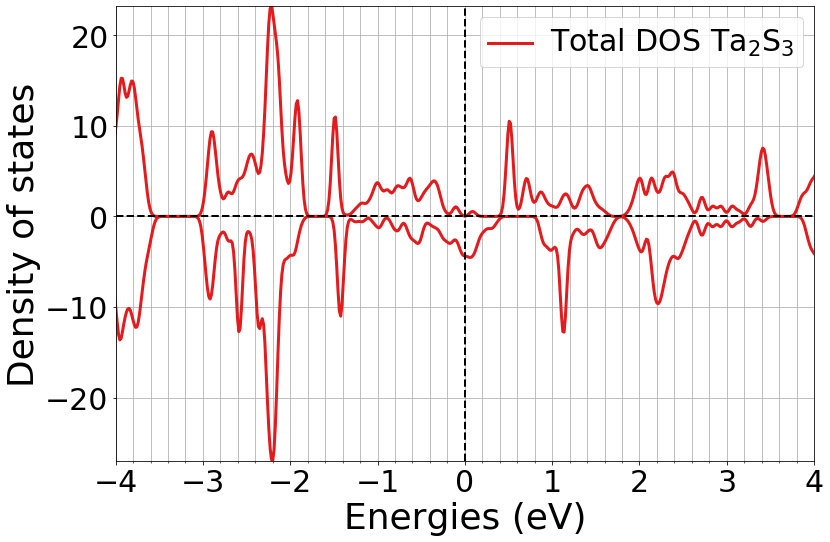

In [11]:
%matplotlib inline
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter
from pymatgen.electronic_structure.core import Spin, Orbital, OrbitalType
from pymatgen.core.sites import PeriodicSite
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams.update({'font.size': 22})

plotter = DosPlotter()

#v = Vasprun('NiPC/NiPC_SpinPol_DOS/vasprun.xml')
v = Vasprun(r'C:\Users\robsc\Documents\Computational Physics MSc\VASP Simulations\vasprun.xml')


tdos = v.tdos
plotter.add_dos(r"Total DOS $\mathrm{Ta_2 S_3}$", tdos)

plotter.show(xlim = [-4, +4])

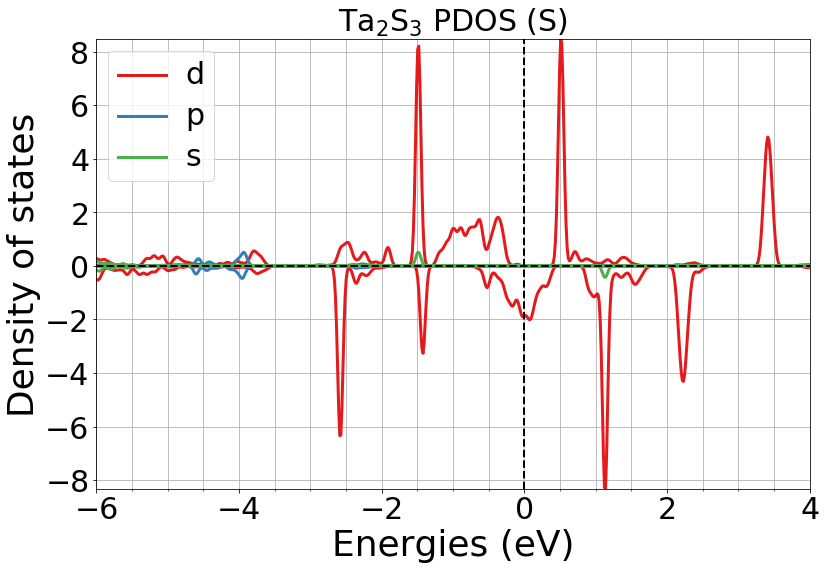

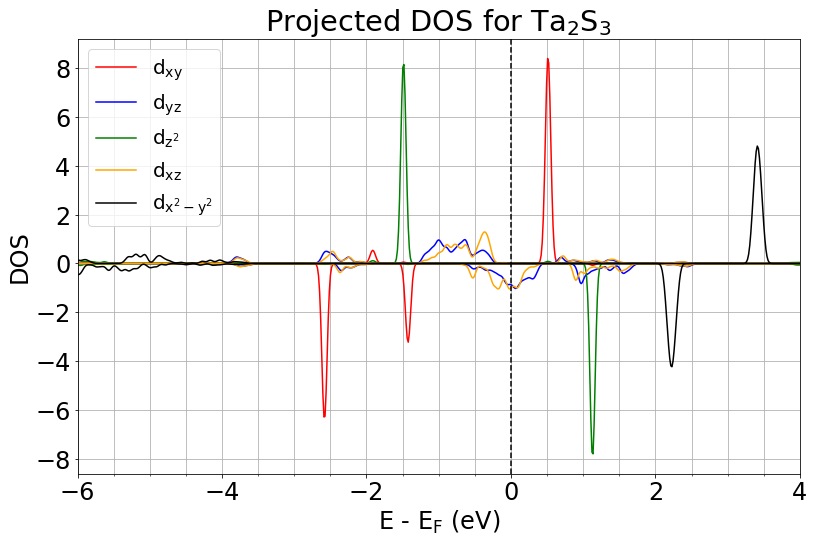

In [13]:
cdos = v.complete_dos
element_dos = cdos.get_element_spd_dos("Mn")

plotter2 = DosPlotter(stack=False)


dxy_up_DOS = np.array(v.pdos[0][Orbital.dxy][Spin.up])
dxy_down_DOS = np.array(v.pdos[0][Orbital.dxy][Spin.down])
dyz_up_DOS = np.array(v.pdos[0][Orbital.dyz][Spin.up])
dyz_down_DOS = np.array(v.pdos[0][Orbital.dyz][Spin.down])
dz2_up_DOS = np.array(v.pdos[0][Orbital.dz2][Spin.up])
dz2_down_DOS = np.array(v.pdos[0][Orbital.dz2][Spin.down])
dxz_up_DOS = np.array(v.pdos[0][Orbital.dxz][Spin.up])
dxz_down_DOS = np.array(v.pdos[0][Orbital.dxz][Spin.down])
dx2_y2_up_DOS = np.array(v.pdos[0][Orbital.dx2][Spin.up])
dx2_y2_down_DOS = np.array(v.pdos[0][Orbital.dx2][Spin.down])


orbitals = [dxy_up_DOS, dxy_down_DOS, dyz_up_DOS, dyz_down_DOS, dz2_up_DOS, dz2_down_DOS,
           dxz_up_DOS, dxz_down_DOS, dx2_y2_up_DOS, dx2_y2_down_DOS]
orbital_names = ['d_{xy}', 'd_{yz}', 'd_{z^2}', 'd_{xz}', 'd_{x^2 - y^2}']

cols = ['red', 'blue', 'green', 'orange', 'black']

energies = tdos.energies - v.efermi

plotter2.add_dos_dict(element_dos)
#plotter2.show(xlim=[-6, 4])
figure = plotter2.get_plot(xlim=[-6,+4])
figure.title(r'$\mathrm{Ta_2 S_3}$ PDOS (S)', fontsize=30)

fig, ax = plt.subplots(figsize=(8*1.618,8))
plt.rcParams['font.size'] = '24'
ax.set_xlim(-6,+4)
for i in range(len(orbital_names)):
    ax.plot(energies, orbitals[2*i], label=r'$\mathrm{%s}$' % (orbital_names[i]), color=cols[i])
    ax.plot(energies, -1*orbitals[2*i+1], color=cols[i])

ax.grid(True, which='both')
ax.legend(fontsize = 20)
ax.set_title(r'Projected DOS for $\mathrm{Ta_2 S_3}$')
ax.set_xlabel(r'E - $\mathrm{E_F}$ (eV)', fontsize = 24)
ax.set_ylabel('DOS', fontsize = 24)
ax.axvline(x=0, linestyle = '--', color='black')


<module 'matplotlib.pyplot' from 'C:\\Users\\Robert Clampett\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

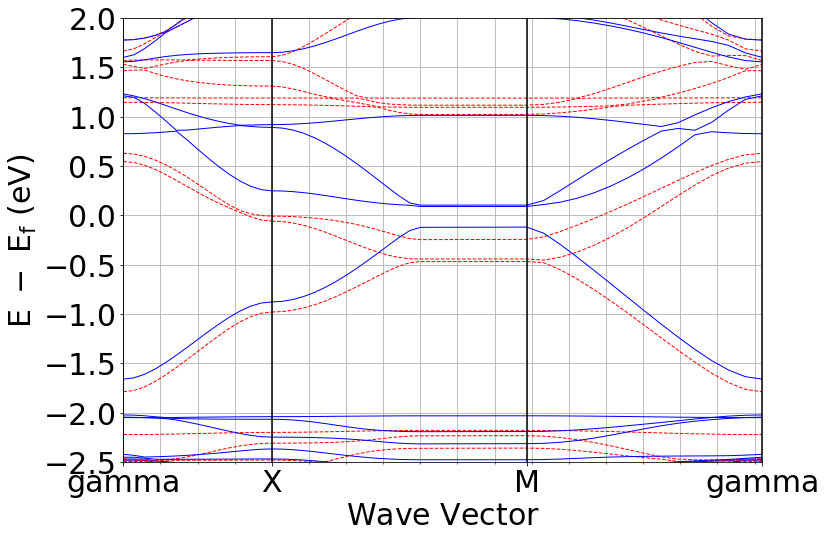

In [26]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter


v = BSVasprun(r"C:\Users\Robert Clampett\Documents\Computation Physics MSc\Project\VASP Calculations\PcNetworks\SuperCell_KBANDS\vasprun.xml")
bs = v.get_band_structure(kpoints_filename=r"C:\Users\Robert Clampett\Documents\Computation Physics MSc\Project\VASP Calculations\PcNetworks\SuperCell_KBANDS\KPOINTS",line_mode=True)
plot = BSPlotter(bs)
plot.get_plot(ylim = (-2.5,+2))
